In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_func(models, dataset="", unsupervised="", loaded=[""]):
    fig, axs = plt.subplots(2, 1, figsize=(8, 16))

    for x in models:
        m = x[0]
        pool = x[1]
        c = x[2]
        for p in pool:
            for l in loaded:
                spearman, pearson = [], []
                std_spearman, std_pearson = [], []
                for i in range(c):
                    res = json.load(open(f"../output/{m}/{p}/{i}_to_{i+1}/test_results{dataset}{unsupervised}{l}.json"))

                    std_1 = res["stdev_cosine_spearman_test"]
                    mean_1 = res["mean_cosine_spearman_test"]
                    std_spearman.append((mean_1-std_1, mean_1+std_1))
                    spearman.append(mean_1)

                    std_2 = res["stdev_cosine_pearson_test"]
                    mean_2 = res["mean_cosine_pearson_test"]
                    std_pearson.append((mean_2-std_2, mean_2+std_2))
                    pearson.append(mean_2)

                axs[0].plot(spearman, label=f"{m} {p} {l}")
                if unsupervised == "":
                    axs[0].fill_between(
                        np.array(list(range(c))), 
                        np.array(std_spearman)[:,0], 
                        np.array(std_spearman)[:,1], 
                        alpha=0.15
                    )
                axs[0].set_xlabel("Index of hidden state")
                axs[0].set_ylabel("Spearman correlation coefficient (test set)")
                axs[0].legend()

                axs[1].plot(pearson, label=f"{m} {p} {l}")
                if unsupervised == "":
                    axs[1].fill_between(
                        np.array(list(range(c))), 
                        np.array(std_pearson)[:,0], 
                        np.array(std_pearson)[:,1], 
                        alpha=0.15
                    )
                axs[1].set_xlabel("Index of hidden state")
                axs[1].set_ylabel("Pearson correlation coefficient (test set)")
                axs[1].legend()

# STSB

### DAPT

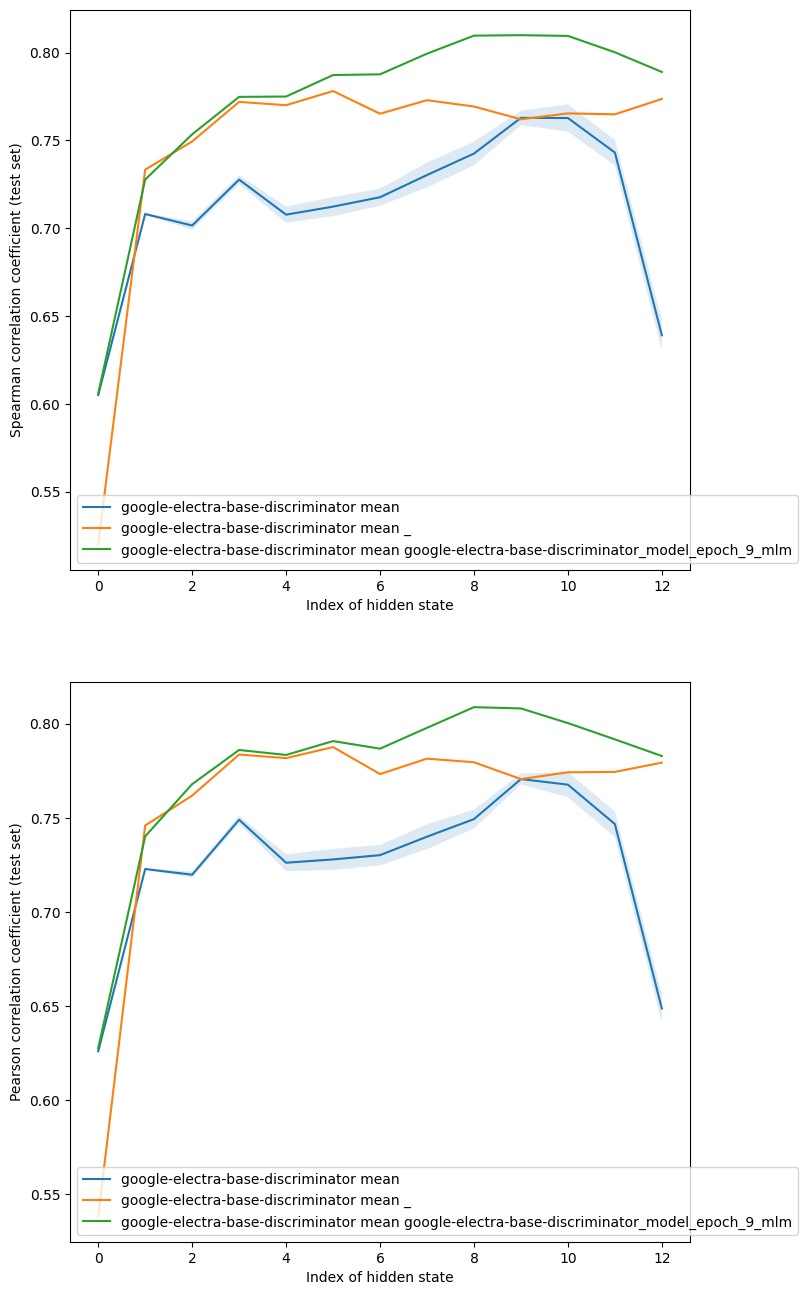

In [3]:
models = [
    #("bert-base-cased", ["mean"], 13),
    ("google-electra-base-discriminator", ["mean"], 13),
]

plot_func(models, loaded=["", "_", "google-electra-base-discriminator_model_epoch_9_mlm"])

### Wordsim merged VS standard

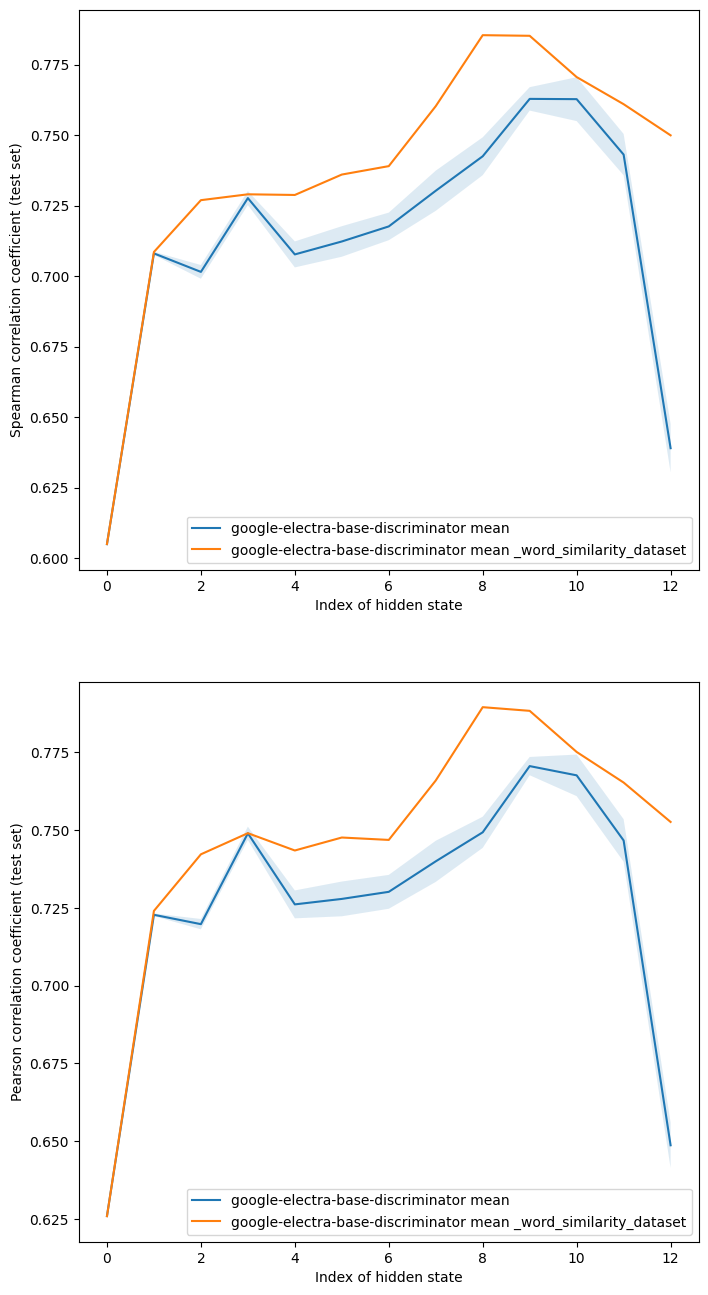

In [4]:
models = [
    #("bert-base-cased", ["mean"], 13),
    ("google-electra-base-discriminator", ["mean"], 13),
]

plot_func(models, loaded=["", "_word_similarity_dataset"])

### WordSim merged datasets

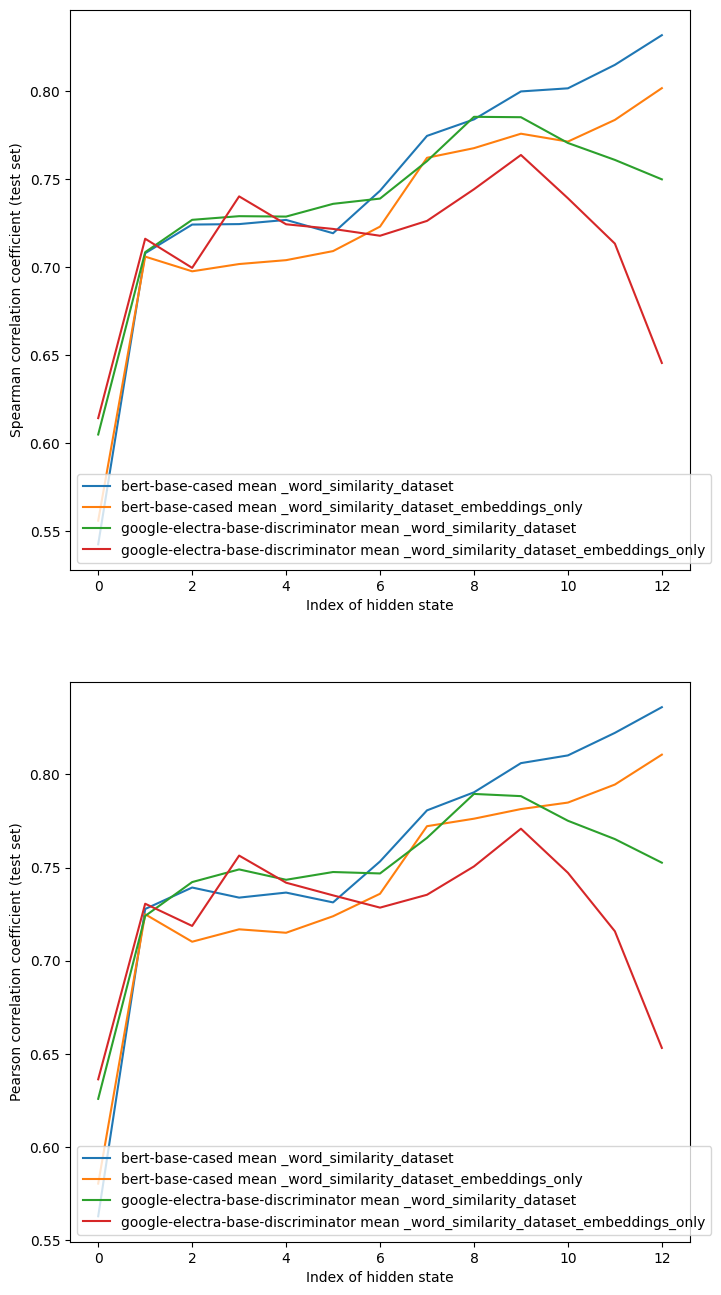

In [5]:
models = [
    ("bert-base-cased", ["mean"], 13),
    ("google-electra-base-discriminator", ["mean"], 13),
]

plot_func(models, loaded=["_word_similarity_dataset", "_word_similarity_dataset_embeddings_only"])

### Combined

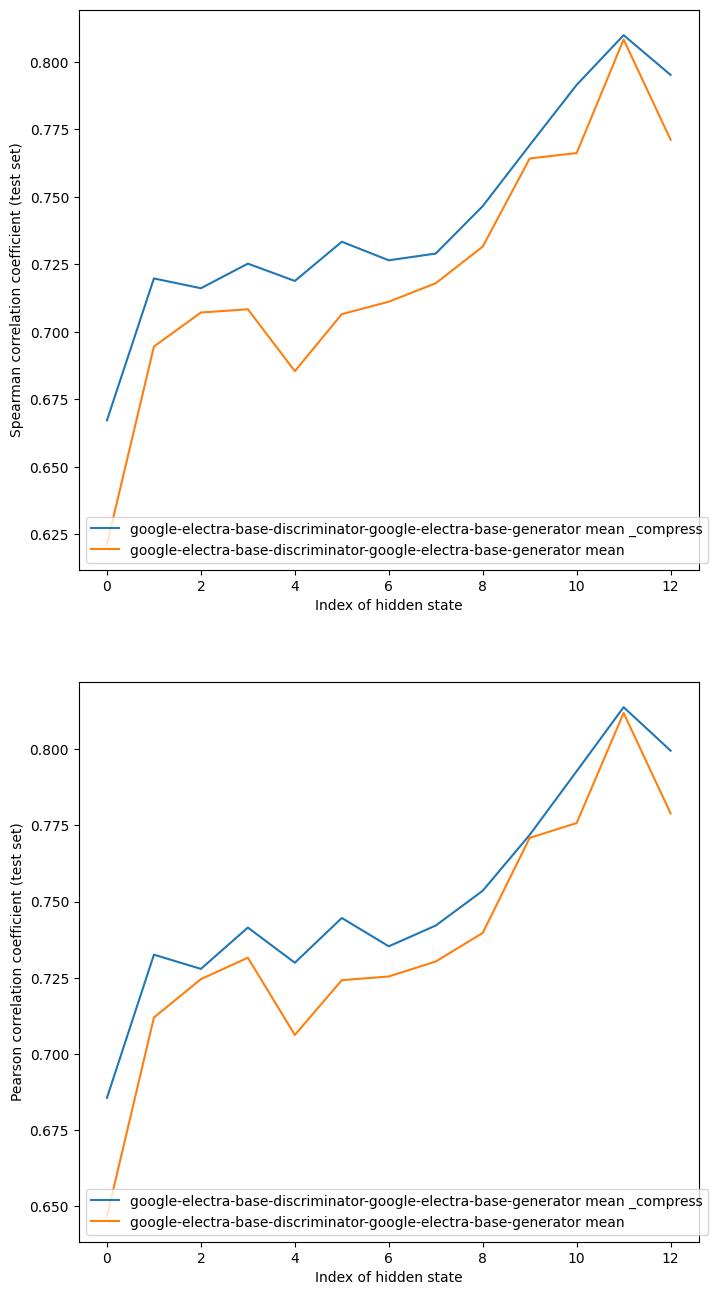

In [6]:
models = [
    ("google-electra-base-discriminator-google-electra-base-generator", ["mean"], 13),
]

plot_func(models, loaded=["_compress", ""])  

### ELECTRA discriminator

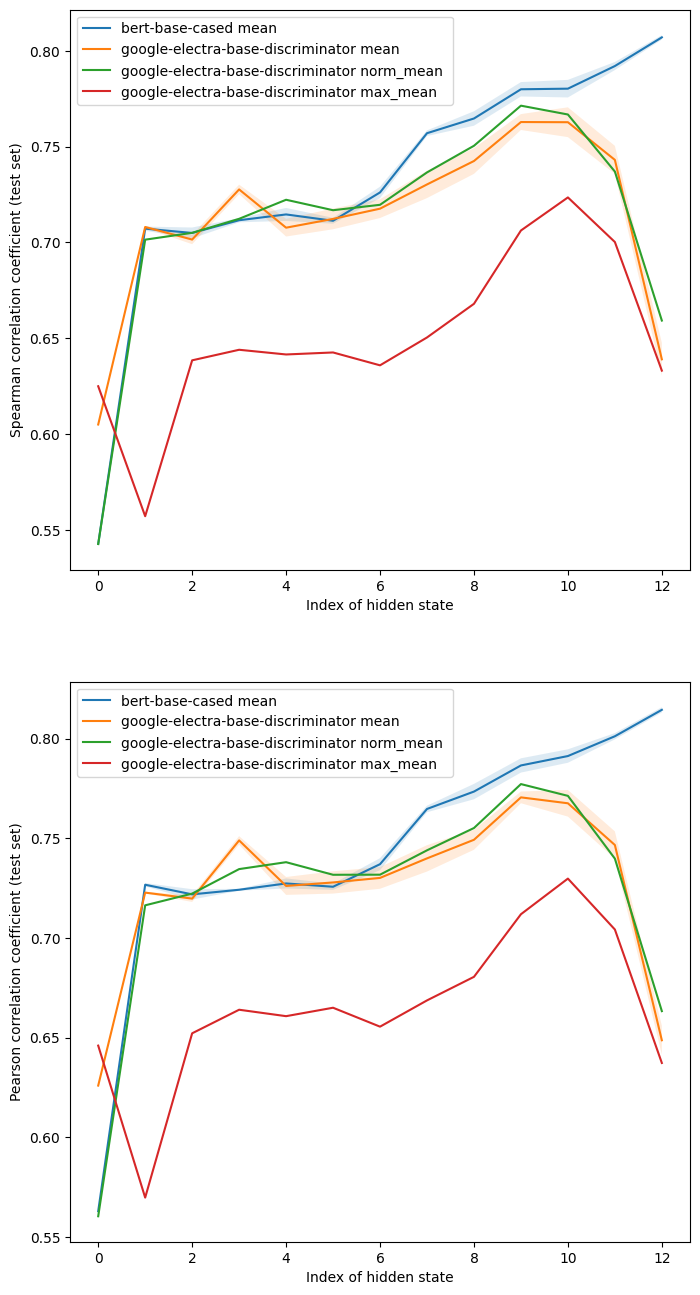

In [7]:
models = [
    ("bert-base-cased", ["mean"], 13), 
    ("google-electra-base-discriminator", ["mean", "norm_mean", "max_mean"], 13),
    #("google-electra-base-generator", ["mean", "cls", "max", "weighted_mean"], 13),
]

plot_func(models)

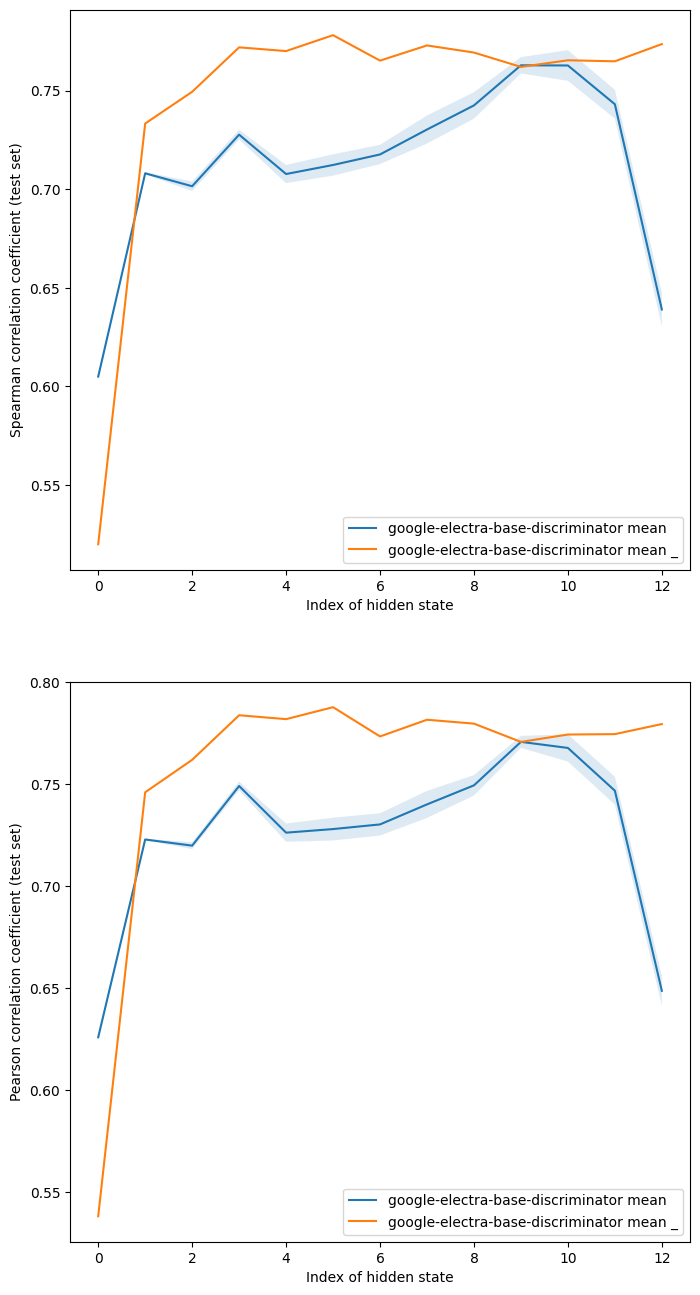

In [8]:
models = [
    ("google-electra-base-discriminator", ["mean"], 13),
]

plot_func(models, loaded=["", "_"])

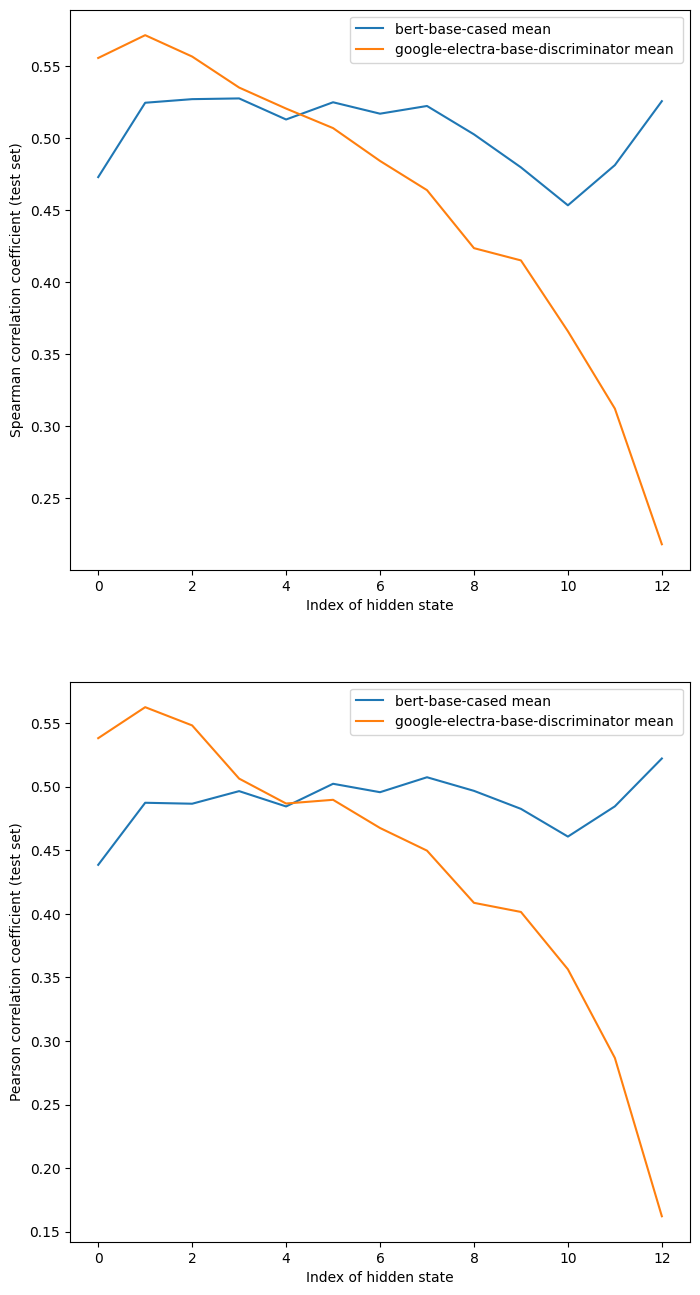

In [9]:
models = [
    ("bert-base-cased", ["mean"], 13), 
    ("google-electra-base-discriminator", ["mean"], 13),
]
plot_func(models, unsupervised="_unsupervised")

 ### ELECTRA generator

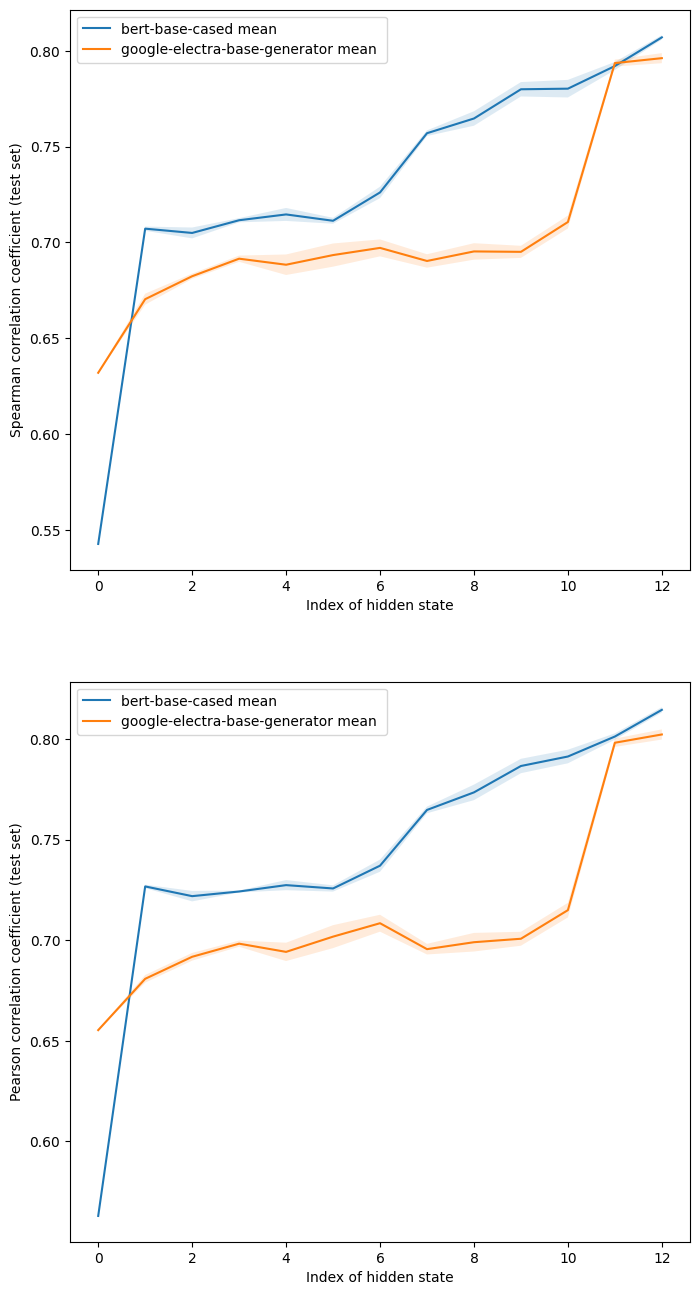

In [10]:
models = [
    ("bert-base-cased", ["mean"], 13), 
    #("google-electra-base-discriminator", ["mean"], 13),
    ("google-electra-base-generator", ["mean"], 13),
]

plot_func(models)

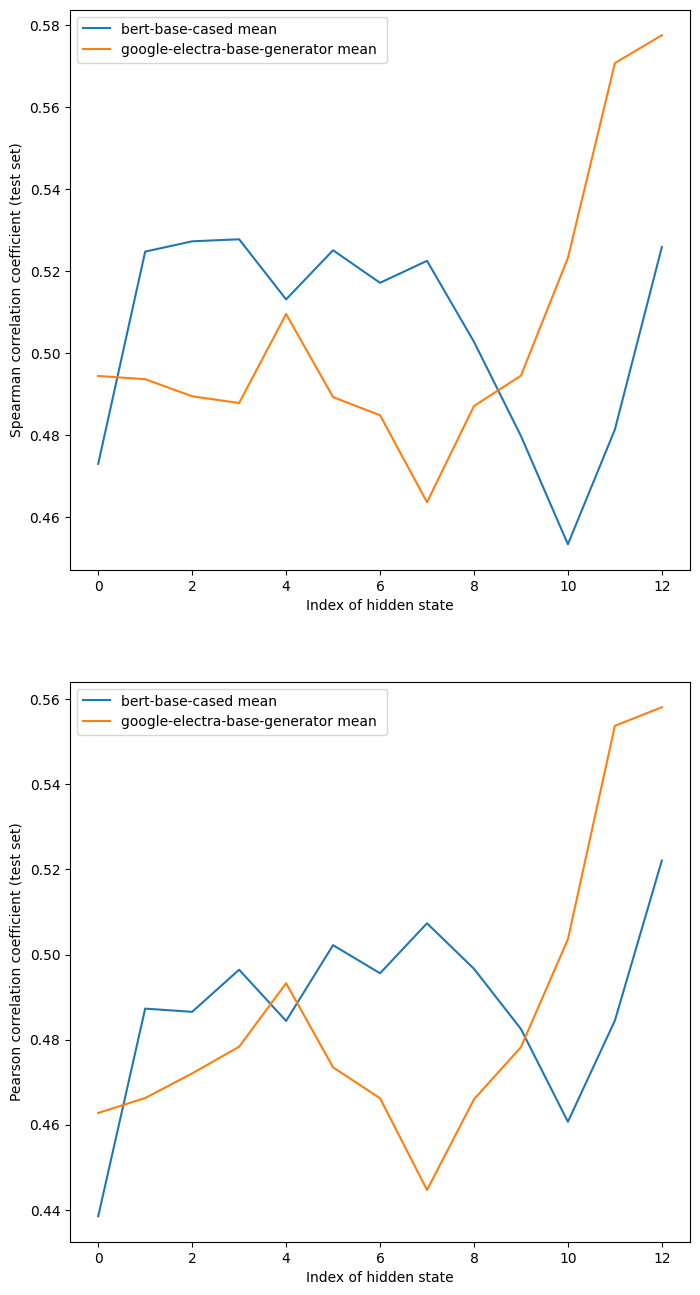

In [11]:
plot_func(models, unsupervised="_unsupervised")

### BERT

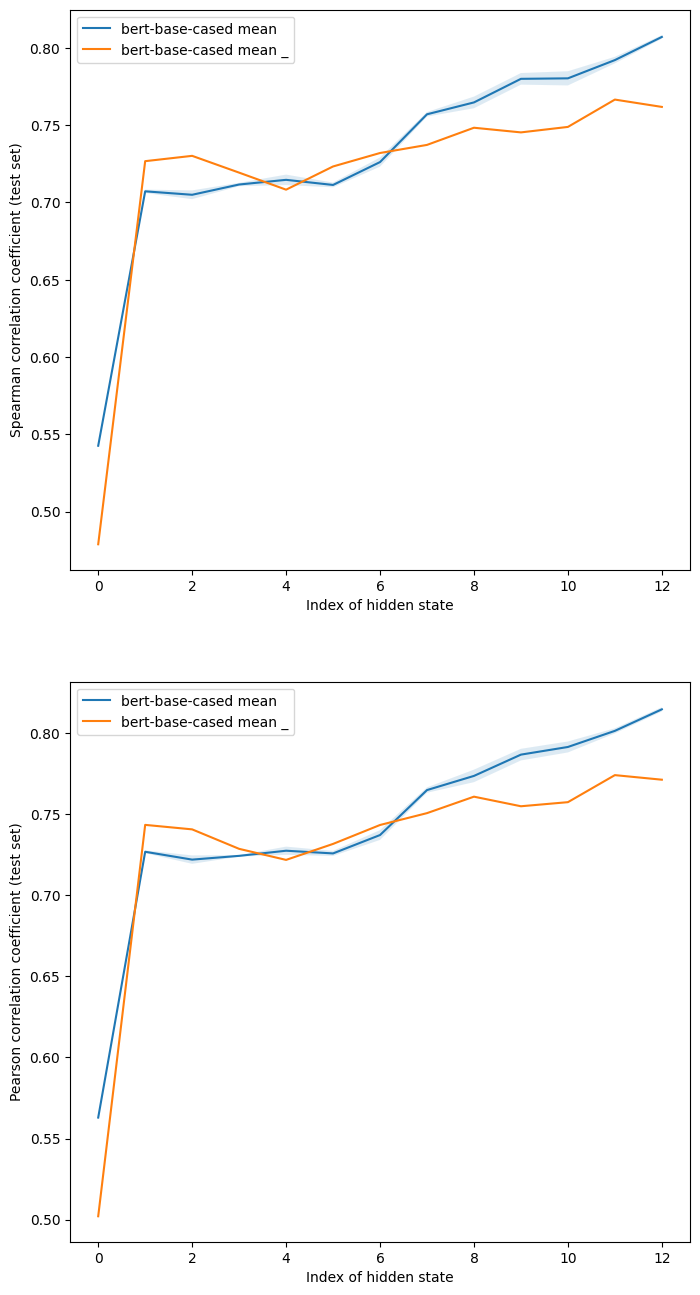

In [12]:
models = [
    ("bert-base-cased", ["mean"], 13), 
]

plot_func(models, loaded=["", "_"])

# KorSTS

### ELECTRA discriminator

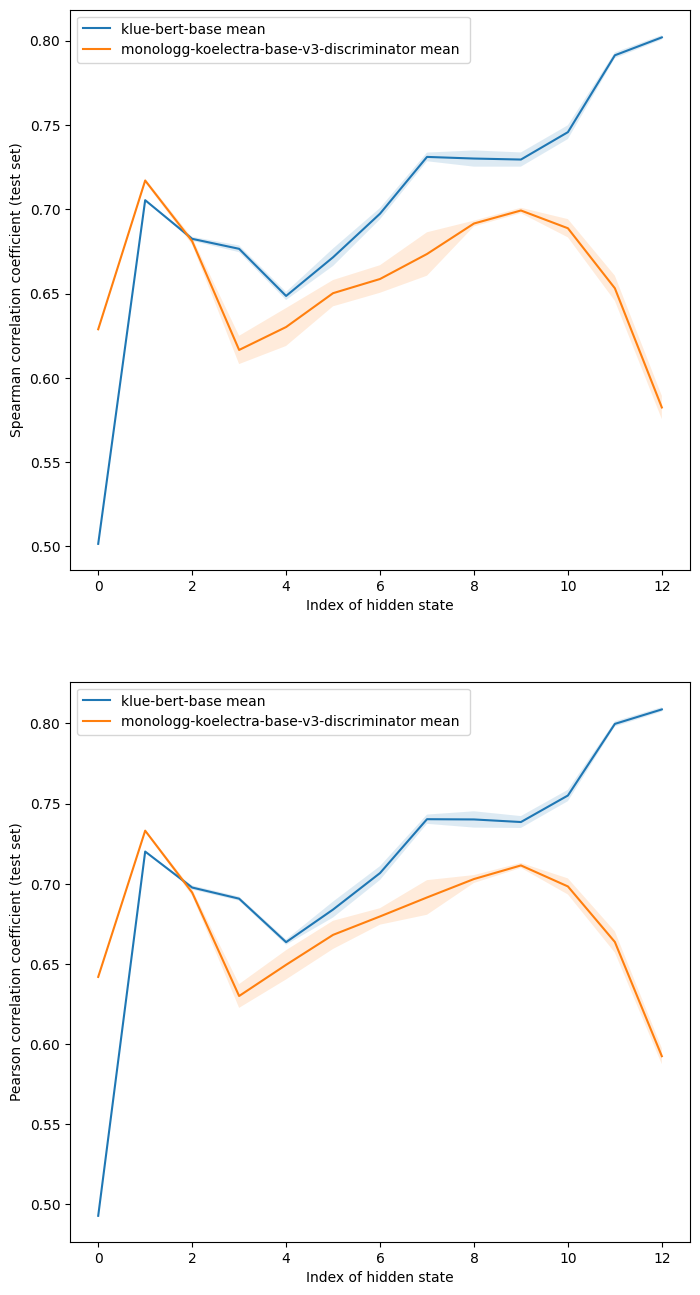

In [13]:
models = [
    ("klue-bert-base", ["mean"], 13), 
    ("monologg-koelectra-base-v3-discriminator", ["mean"], 13),
    #("monologg-koelectra-base-v3-generator", ["mean"], 13),
]

plot_func(models, dataset="_kor_sts")

In [14]:
#plot_func(models, dataset="_kor_sts", unsupervised="_unsupervised")

### ELECTRA generator

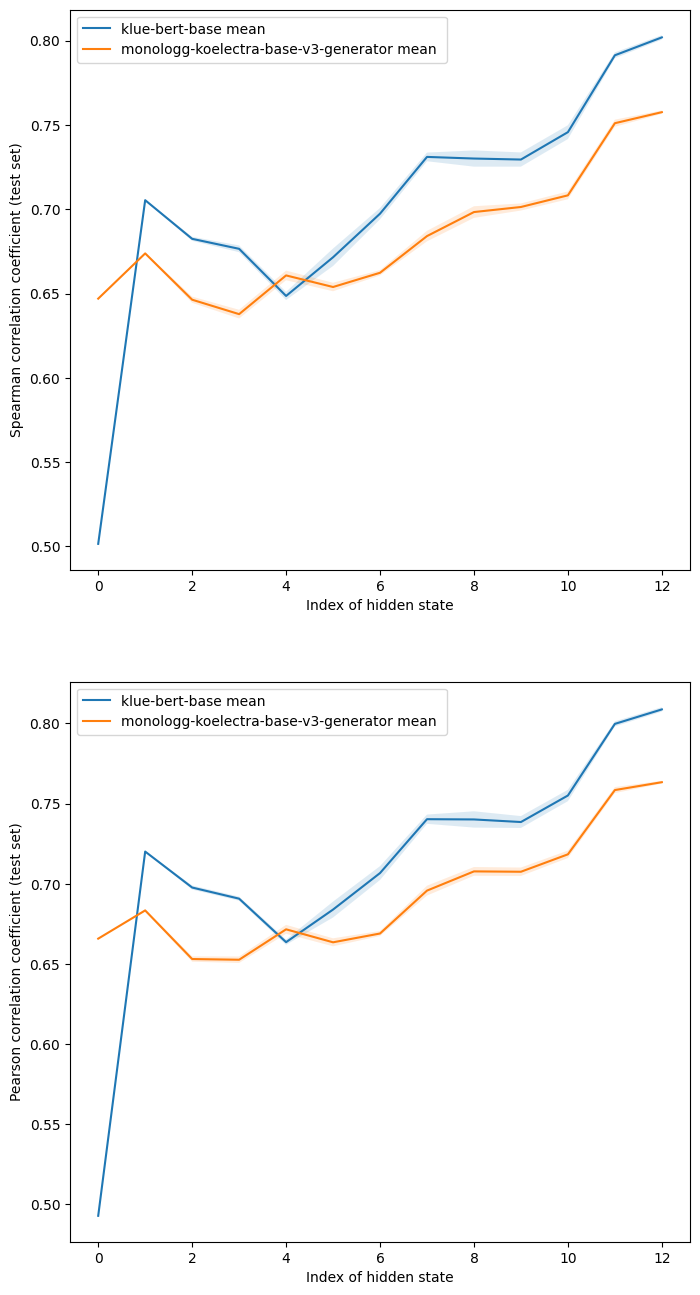

In [15]:
models = [
    ("klue-bert-base", ["mean"], 13), 
    #("monologg-koelectra-base-v3-discriminator", ["mean"], 13),
    ("monologg-koelectra-base-v3-generator", ["mean"], 13),
]

plot_func(models, dataset="_kor_sts")

In [16]:
#plot_func(models, dataset="_kor_sts", unsupervised="_unsupervised")

# German STS

### ELECTRA discriminator

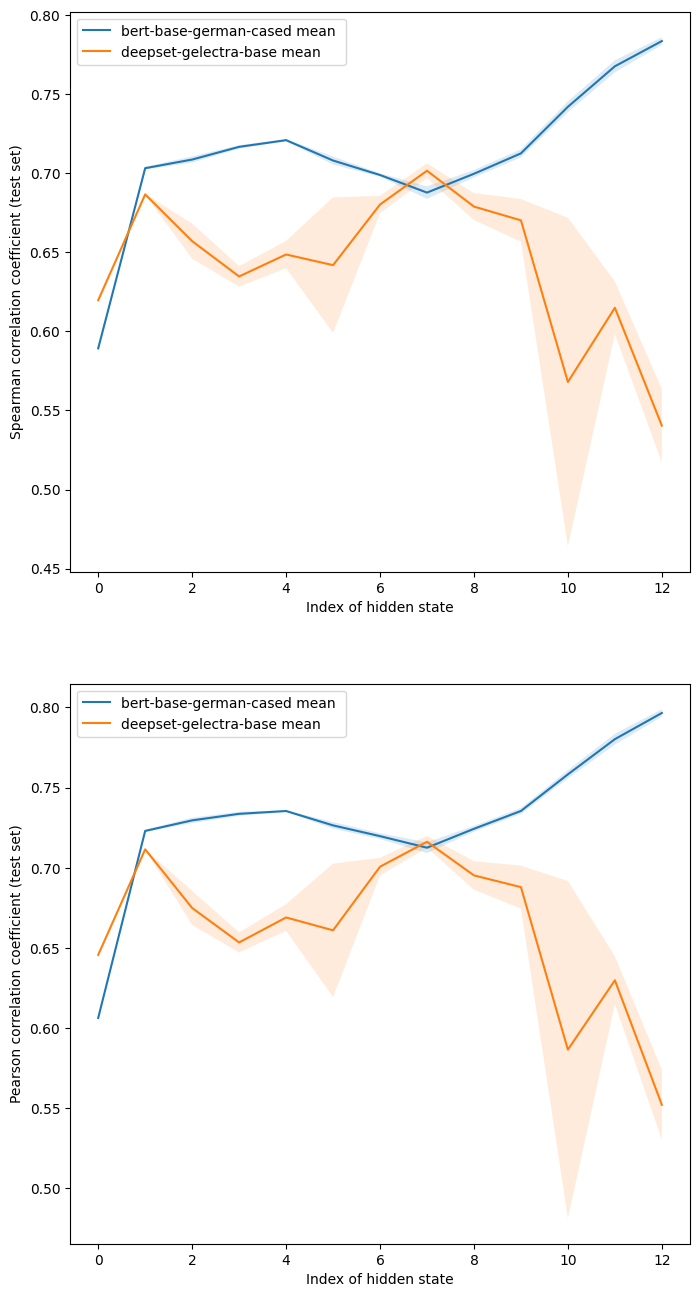

In [17]:
models = [
    ("bert-base-german-cased", ["mean"], 13), 
    ("deepset-gelectra-base", ["mean"], 13),
    #("deepset-gelectra-base-generator", ["mean"], 13),
]
plot_func(models, dataset="_german_sts")

In [18]:
#plot_func(models, dataset="_german_sts", unsupervised="_unsupervised")

### ELECTRA generator

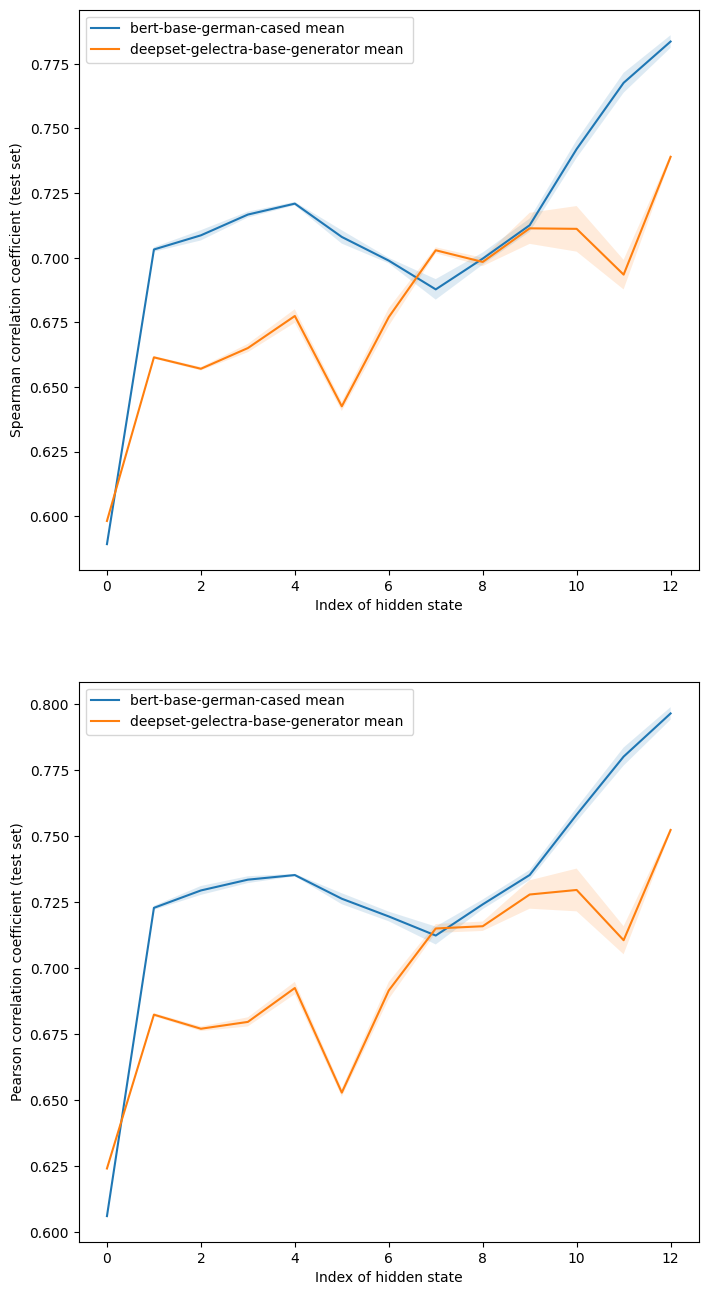

In [19]:
models = [
    ("bert-base-german-cased", ["mean"], 13), 
    #("deepset-gelectra-base", ["mean"], 13),
    ("deepset-gelectra-base-generator", ["mean"], 13),
]
plot_func(models, dataset="_german_sts")

In [20]:
#plot_func(models, dataset="_german_sts", unsupervised="_unsupervised")

# Spanish STS

### ELECTRA discriminator

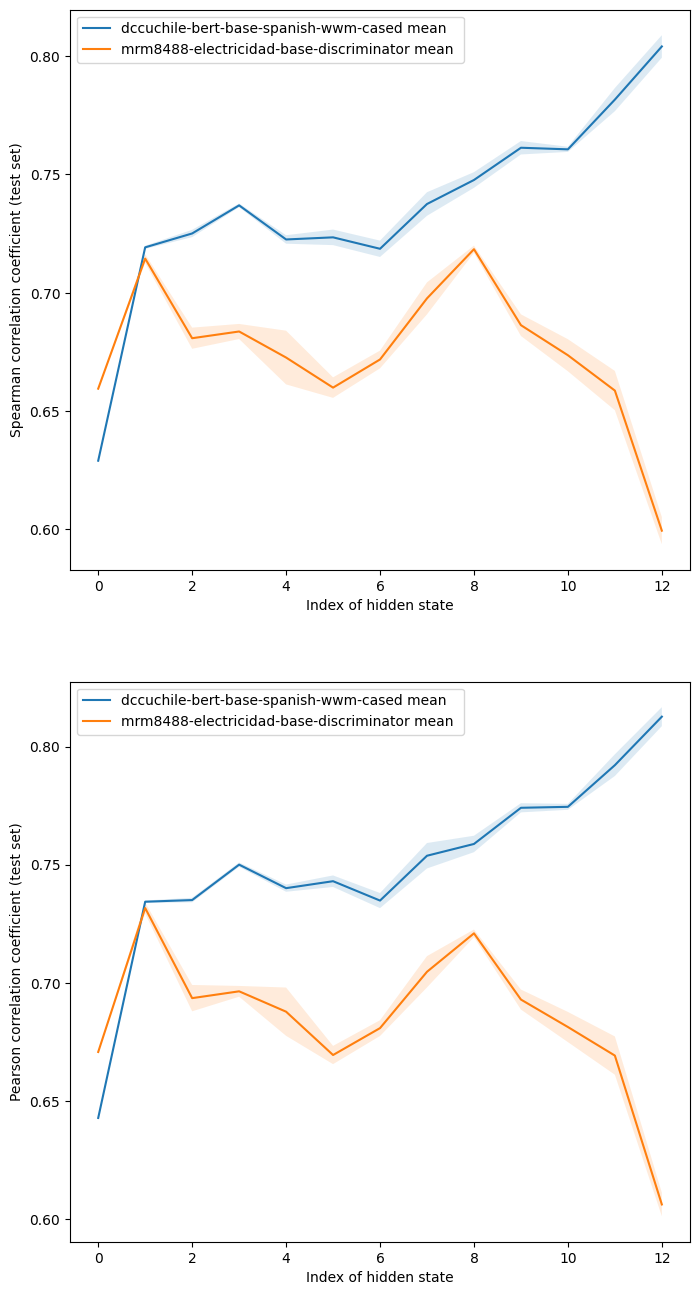

In [21]:
models = [
    ("dccuchile-bert-base-spanish-wwm-cased", ["mean"], 13),
    ("mrm8488-electricidad-base-discriminator", ["mean"], 13),
    #("mrm8488-electricidad-base-generator", ["mean"], 13), 
]
plot_func(models, dataset="_spanish_sts")

### ELECTRA generator

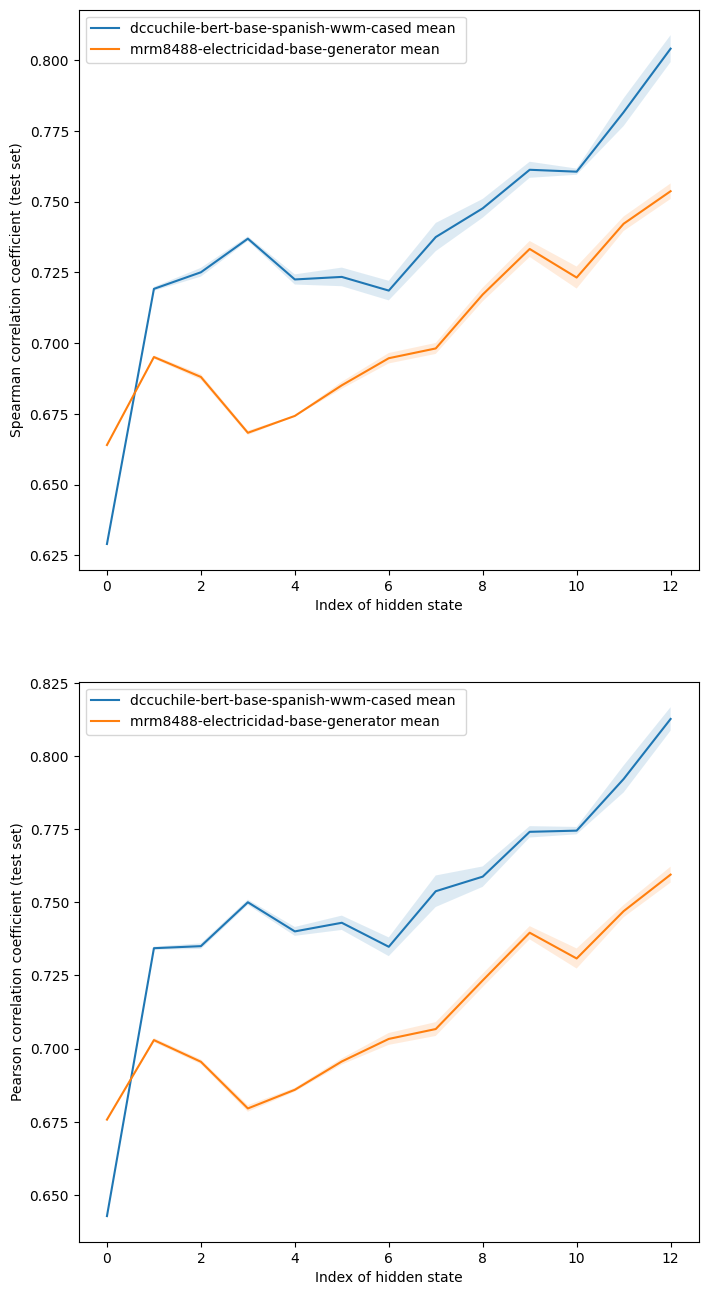

In [22]:
models = [
    ("dccuchile-bert-base-spanish-wwm-cased", ["mean"], 13),
    #("mrm8488-electricidad-base-discriminator", ["mean"], 13),
    ("mrm8488-electricidad-base-generator", ["mean"], 13), 
]
plot_func(models, dataset="_spanish_sts")